In [1]:
import numpy as np 
import matplotlib.pyplot as pl
import random

In [2]:
def generate_matrix(X, d):
  Output = np.power(X,0)

  for i in range(1, d + 1):
    Output = np.vstack([Output, np.power(X, i)])
    
  Output = np.matrix(Output)

  return Output.T

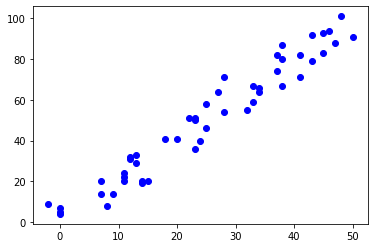

In [3]:
#Generate datapoints

X_List = []
Y_List = []
spread   = 5
n_points = 50

for x in range(0,n_points):

  X_List.append(x + 
           spread - random.randint(0,spread * 2))
  Y_List.append(2*x + 1 + 
           spread - random.randint(0,spread * 2))

pl.plot(X_List, Y_List, 'bo')
X = np.matrix(generate_matrix(X_List,1))
Y = np.matrix(Y_List)

In [4]:
def sqErrorFunction(X, Y, theta): #Cost function: J = (1/m) * (X*theta - Y)^2
  s = X @ theta - Y.T
  J = (1/len(X)) * (s.T @ s)
  
  return J.item(0,0)

In [5]:
def gradient(X, Y, theta, alpha): #Gradient: delta = (alpha/m) * 2 * (X*theta - Y) * X (The derivative of the cost function)
  m = len(X) 
  s = X @ theta - Y.T

  theta = np.subtract(theta, (2*alpha/m) * np.matmul(s.T, X).T)

  return theta

Iteration 0: 1497.1610860202243
Iteration 100: 46.11244000024083
Iteration 200: 45.906573702850174
Iteration 300: 45.720724004869325
Iteration 400: 45.552944671013464
Iteration 500: 45.40147870052796
Iteration 600: 45.264739927713215
Iteration 700: 45.141296411450504
Iteration 800: 45.02985543978147
Iteration 900: 44.929249992508666
Cost Function: 44.83928953680003
Theta: [[1.2720654 ]
 [1.94708961]]
Prediction f(x) = 1.95x + 1.27


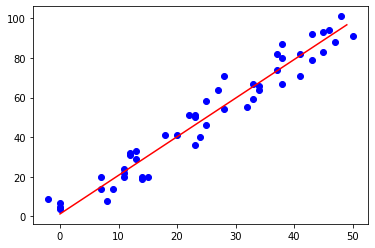

In [6]:
def main():
  T = np.matrix([[0, 0]]).T
  iterations = 1000
  alpha      = 0.001

  for i in range(iterations):
    T = gradient(X, Y, T, alpha)

    if(i % 100 == 0):
      J = sqErrorFunction(X, Y, T)
      print("Iteration {}: {}".format(i,J))

  J = sqErrorFunction(X, Y, T)
  print("Cost Function: {}".format(J))
  print("Theta: {}".format(T))

  a = T.item(1,0)
  b = T.item(0,0)

  print(f"Prediction f(x) = {round(a, 2)}x + {round(b , 2)}") #If Generate datapoints wasn't changed f(x) should be around 2x + 1

  X_Pred = []
  Y_Pred = []

  for x in range(0, n_points):
    X_Pred.append(x)

    y = a*x + b # y = a*x + b linear function
    Y_Pred.append(y)

  pl.plot(X_List, Y_List, 'bo', X_Pred, Y_Pred, 'r') #Datapoints are in Blue | Prediction is a line in Red

main()